In [11]:
# importing dependenciesimport matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import csv
from datetime import datetime

# Import API key
from api_keys import g_key

# importing 2012 - 2017 data from csv downloaded from NYC DMV website
csv_file = "Resources/Motor_Vehicle_Collisions.csv"
dmv_all_data = pd.read_csv(csv_file, encoding="ISO-8859-1", low_memory=False)

# revising the dataframe with columns that has relevance for our analysis
dmv_all_data = dmv_all_data[['CRASH DATE', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
                            'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                            'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                            'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                            'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
                            'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                            'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']]

# displaying the dataframe and initial row count
count_row = "{:,.0f}".format(dmv_all_data.shape[0])
print(f'Total row of the dataframe before any clean up: {count_row}')
dmv_all_data.head()

Total row of the dataframe before any clean up: 1,684,041


,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,07/04/2018,BROOKLYN,11225,40.663456,-73.95836,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
1,07/18/2018,NaN,NaN,40.849236,-73.92371,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,07/12/2018,NaN,NaN,40.696014,-73.92153,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
3,07/18/2018,BRONX,10473,40.816906,-73.84755,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Taxi,Station Wagon/Sport Utility Vehicle
4,07/03/2018,MANHATTAN,10065,40.761856,-73.96343,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,Taxi,NaN


In [12]:
# Adding year & month column to the dataframe to create timeline
dmv_cleaned_data = dmv_all_data.assign(YEAR=dmv_all_data['CRASH DATE'].str.slice(6, 10), 
                                        MONTH=dmv_all_data['CRASH DATE'].str.slice(0, 2).astype(int))
# Convert month by name
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
group_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dmv_cleaned_data["MONTH NAME"] = pd.cut(dmv_cleaned_data["MONTH"], bins, labels=group_names, include_lowest=True)

# Dropping rows where an important column contains NaN Value
dmv_cleaned_data.dropna(subset=['BOROUGH', 'ZIP CODE', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1',
                            'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'], inplace=True)

# Further cleaning up the dataset by dropping rows with meaningless values
dmv_cleaned_data = dmv_cleaned_data.loc[(dmv_cleaned_data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified') & 
                                      (dmv_cleaned_data['VEHICLE TYPE CODE 1'] != 'UNKNOWN')]

# creating dataset for 2012 and exporting to csv for local use
dmv_2012_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2012')]
dmv_2012_data.to_csv("Resources/dmv_2012_data.csv", encoding="utf-8", index=False)

# creating dataset for 2013 and exporting to csv for local use
dmv_2013_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2013')]
dmv_2013_data.to_csv("Resources/dmv_2013_data.csv", encoding="utf-8", index=False)

# creating dataset for 2014 and exporting to csv for local use
dmv_2014_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2014')]
dmv_2014_data.to_csv("Resources/dmv_2014_data.csv", encoding="utf-8", index=False)

# creating dataset for 2015 and exporting to csv for local use
dmv_2015_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2015')]
dmv_2015_data.to_csv("Resources/dmv_2015_data.csv", encoding="utf-8", index=False)

# creating dataset for 2016 and exporting to csv for local use
dmv_2016_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2016')]
dmv_2016_data.to_csv("Resources/dmv_2016_data.csv", encoding="utf-8", index=False)

# creating dataset for 2017 and exporting to csv for local use
dmv_2017_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2017')]
dmv_2017_data.to_csv("Resources/dmv_2017_data.csv", encoding="utf-8", index=False)

# creating dataset for 2018 and exporting to csv for local use
dmv_2018_data = dmv_cleaned_data.loc[(dmv_cleaned_data['YEAR'] == '2018')]
dmv_2018_data.to_csv("Resources/dmv_2018_data.csv", encoding="utf-8", index=False)

# displaying the cleaned dataframe and final row count
count_row = "{:,.0f}".format(dmv_cleaned_data.shape[0])
print(f'Total number of rows of the CLEANED dataframe: {count_row}')
dmv_cleaned_data.head()

Total number of rows of the CLEANED dataframe: 692,784


,CRASH DATE,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,YEAR,MONTH,MONTH NAME
0,07/04/2018,BROOKLYN,11225,40.663456,-73.95836,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2018,7,Jul
3,07/18/2018,BRONX,10473,40.816906,-73.84755,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Taxi,Station Wagon/Sport Utility Vehicle,2018,7,Jul
4,07/03/2018,MANHATTAN,10065,40.761856,-73.96343,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,Taxi,NaN,2018,7,Jul
10,07/15/2018,QUEENS,11358,40.760784,-73.80677,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2018,7,Jul
11,07/22/2018,BRONX,10453,40.861862,-73.91282,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2018,7,Jul


In [13]:
# 2018 Motor Vehicle Collisions Analysis
# Dataframe of accidents by borough
accidents_by_borough_2018 = dmv_2018_data.groupby(["BOROUGH"])
total_by_borough = accidents_by_borough_2018["BOROUGH"].count().map("{:,.0f}".format)

# creating new dataframe for charts
monthly_total_accident = pd.DataFrame({
    "Total Accident": total_by_borough
})

# display dataframe as point of reference
monthly_total_accident

,Total Accident
BOROUGH,
BRONX,"16,592"
BROOKLYN,"32,635"
MANHATTAN,"24,992"
QUEENS,"32,377"
STATEN ISLAND,"5,235"


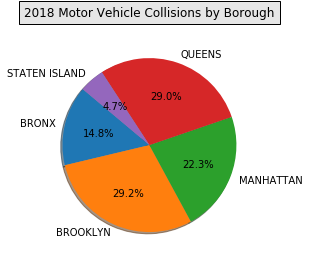

In [14]:
# 2018 Motor Vehicle Collisions Analysis
# Number of accidents by borough
accidents_by_borough_2018 = dmv_2018_data.groupby('BOROUGH').size()

# Labels for the sections of our pie chart
labels = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

# The colors of each section of the pie chart
colors = ["C0", "C1", "C2", "C3", "C4"]

# plotting pie chart and removing y-axis label
_=accidents_by_borough_2018.plot.pie(labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140 )
_=plt.title("2018 Motor Vehicle Collisions by Borough", bbox={'facecolor':'0.9', 'pad':5}, pad=20)
_=plt.ylabel("")
plt.savefig("Images/accident_by_bourough_2018.png")

In [15]:
# 2018 Motor Vehicle Collisions Analysis
# creating new dataframe grouped by Month
monthly_data_2018 = dmv_2018_data.groupby(["MONTH NAME"])
accident_by_time_point_2018 = monthly_data_2018["MONTH NAME"].count()

# creating new dataframe for charts
monthly_total_accident = pd.DataFrame({
    "Total Accident": accident_by_time_point_2018.map("{:,.0f}".format)
})

# display dataframe as point of reference
monthly_total_accident

,Total Accident
MONTH NAME,
Jan,"8,864"
Feb,"7,860"
Mar,"9,430"
Apr,"8,811"
May,"10,135"
Jun,"10,034"
Jul,"9,573"
Aug,"9,425"
Sep,"9,231"


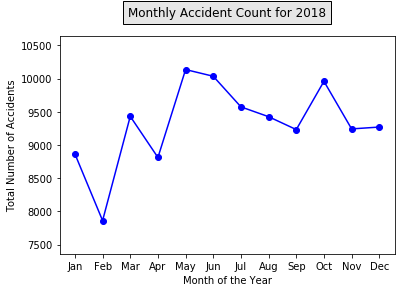

In [16]:
# Generate a line chart showing total number of accidents per month for 2018
group_keys = list(monthly_data_2018.groups.keys())
plt.plot(group_keys, accident_by_time_point_2018, marker ='o', color='blue', label="Sine")
ymin = min(accident_by_time_point_2018)-500
ymax = max(accident_by_time_point_2018)+500

# Adding axis labels
_=plt.title("Monthly Accident Count for 2018", bbox={'facecolor':'0.9', 'pad':5}, pad=20)
_=plt.xlabel("Month of the Year")
_=plt.ylabel("Total Number of Accidents")
_=plt.ylim(ymin, ymax)
plt.savefig("Images/accident_by_month_2018.png")

In [17]:
# Generate a dataframe to analyze the level of severity of the accidents
accidents_with_no_injury = len(dmv_2018_data.loc[(dmv_2018_data['NUMBER OF PERSONS INJURED'].astype(int)==0) & 
                                             (dmv_2018_data['NUMBER OF PERSONS KILLED'].astype(int)==0)])
accidents_with_injury = len(dmv_2018_data.loc[(dmv_2018_data['NUMBER OF PERSONS INJURED'].astype(int)>0)])
accidents_with_fatality = len(dmv_2018_data.loc[(dmv_2018_data['NUMBER OF PERSONS KILLED'].astype(int)>0)])
total_accidents_2018 = accidents_with_no_injury + accidents_with_injury + accidents_with_fatality
accident_2018_dict = [{
    "No Injury": "{:,.0f}".format(accidents_with_no_injury),
    "Injury": "{:,.0f}".format(accidents_with_injury),
    "Fatality": "{:,.0f}".format(accidents_with_fatality),
    "Total Accidents": "{:,.0f}".format(total_accidents_2018)
}]
accident_2018_df = pd.DataFrame(accident_2018_dict)
accident_2018_df

,No Injury,Injury,Fatality,Total Accidents
0,"90,335","21,425",99,"111,859"


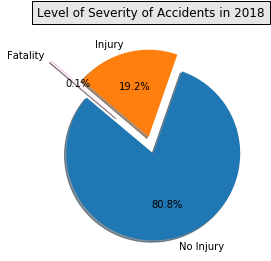

In [18]:
# Generate a pie chart to analyze the level of severity of the accidents
# The value of different level of accident severity
total_accidents = [accidents_with_no_injury, accidents_with_injury, accidents_with_fatality]

# Labels for the sections of our pie chart
labels = ["No Injury", "Injury", "Fatality"]

# The colors of each section of the pie chart
colors = ["C0", "C1", "C6"]

# trying to seperate the "Fatality" section from the others
explode = (0.1, 0.1, 0.5)

# plotting pie chart and removing y-axis label
_=plt.pie(total_accidents, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
_=plt.title("Level of Severity of Accidents in 2018", bbox={'facecolor':'.9', 'pad':5}, pad=20)
_=plt.ylabel("")
plt.savefig("Images/accident_by_severity_2018.png")